In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
Y_train[200]

1

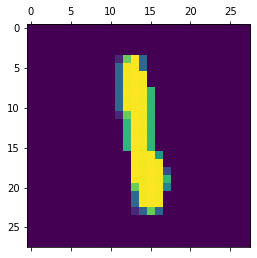

In [6]:
plt.matshow(X_train[200])

# Scaling the dataset

In [7]:
X_train=X_train/255.
X_test=X_test/255.

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Converting the 28x28 two-dimensional array into a one-dimensional array

In [9]:
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [10]:
print(X_train_flatten.shape)
X_test_flatten.shape

(60000, 784)


(10000, 784)

In [11]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
model=keras.Sequential([
     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')  
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flatten,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4703 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3033 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9250


In [13]:
#Evaluating the model
model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2649 - accuracy: 0.9261


[0.2649427056312561, 0.9261000156402588]

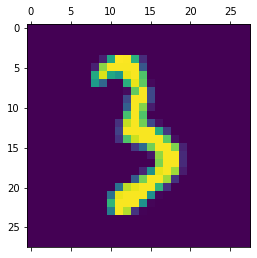

In [14]:
plt.matshow(X_test[44])

In [18]:
y_pred=model.predict(X_test_flatten)
np.argmax(y_pred[44])

3

In [19]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]


[7, 2, 1, 0, 4]

In [20]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
confusion_matrix=tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    7,  935,   16,    8,    2,   11,   10,   37,    3],
       [   1,    0,   24,  922,    0,   19,    2,   12,   23,    7],
       [   1,    2,    5,    1,  916,    0,   10,    4,    9,   34],
       [   8,    3,    6,   37,   11,  754,   12,    9,   44,    8],
       [   9,    3,    7,    1,    7,    8,  917,    2,    4,    0],
       [   1,    6,   23,    6,    8,    0,    0,  946,    2,   36],
       [   5,    9,    7,   17,    9,   18,    8,   11,  882,    8],
       [  10,    7,    1,   10,   30,    6,    0,   20,   10,  915]])>

# Visualizing the Confusion Matrix

In [24]:
!pip install seaborn


In [25]:
import seaborn as sn

Text(69.0, 0.5, 'Truth')

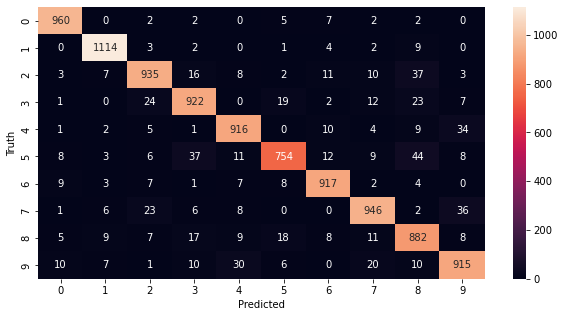

In [27]:
plt.figure(figsize=(10,5))
sn.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")


# Improving Model by adding more Layers

In [29]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flatten,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2689 - accuracy: 0.9241
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1199 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0842 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0642 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9845


In [30]:
#Evaluating the model
model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9754


[0.07811769843101501, 0.9753999710083008]

Text(69.0, 0.5, 'Truth')

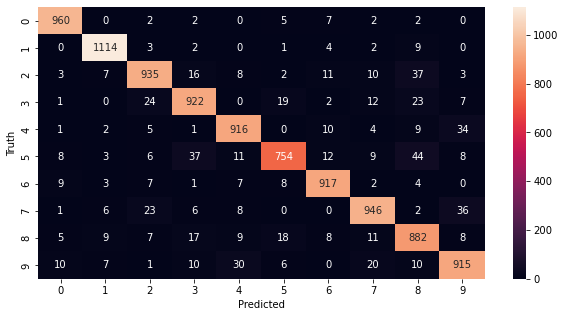

In [31]:
plt.figure(figsize=(10,5))
sn.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
